<a href="https://colab.research.google.com/github/SauloHenriqueAguiar/CryptoFinanceQuant/blob/main/Cointegracaodeativos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
#baixar bibliotecas
!pip install yfinance --upgrade --no-cache-dir

In [64]:
#importar bibliotecas
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import pandas_datareader.data as web
yf.pdr_override()
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint

In [46]:
symbols = ['SOL-USD','LUNA1-USD','BNB-USD','LTC-USD','XMR-USD','AAVE-USD']

In [47]:
portfolio = web.get_data_yahoo(symbols, period='1y')['Close']

[*********************100%***********************]  6 of 6 completed


In [48]:
portfolio = portfolio.rename(columns={'SOL-USD':'Solana','LUNA1-USD':'Luna','BNB-USD':'BNB','LTC-USD':'Litecoin','XMR-USD':'Monero','AAVE-USD':'AAVE'})

In [49]:
portfolio

,AAVE,BNB,Litecoin,Luna,Solana,Monero
Date,,,,,,
2021-05-07,445.222382,624.563293,346.253571,16.582764,43.155018,457.144989
2021-05-08,466.317566,646.100830,346.368744,16.984989,45.561531,475.472778
2021-05-09,459.587219,662.228577,386.450775,16.993803,44.330196,483.583618
2021-05-10,433.053558,631.351990,359.329315,15.868883,42.909634,441.637360
2021-05-11,457.178070,672.333923,377.388794,16.311174,44.577469,453.531128
...,...,...,...,...,...,...
2022-05-02,144.047058,389.670654,100.693230,84.309166,87.581017,198.667160
2022-05-03,141.099213,383.475800,99.343018,82.594147,85.842377,207.541031
2022-05-04,159.080444,402.502655,106.274864,86.172264,92.770851,225.181686


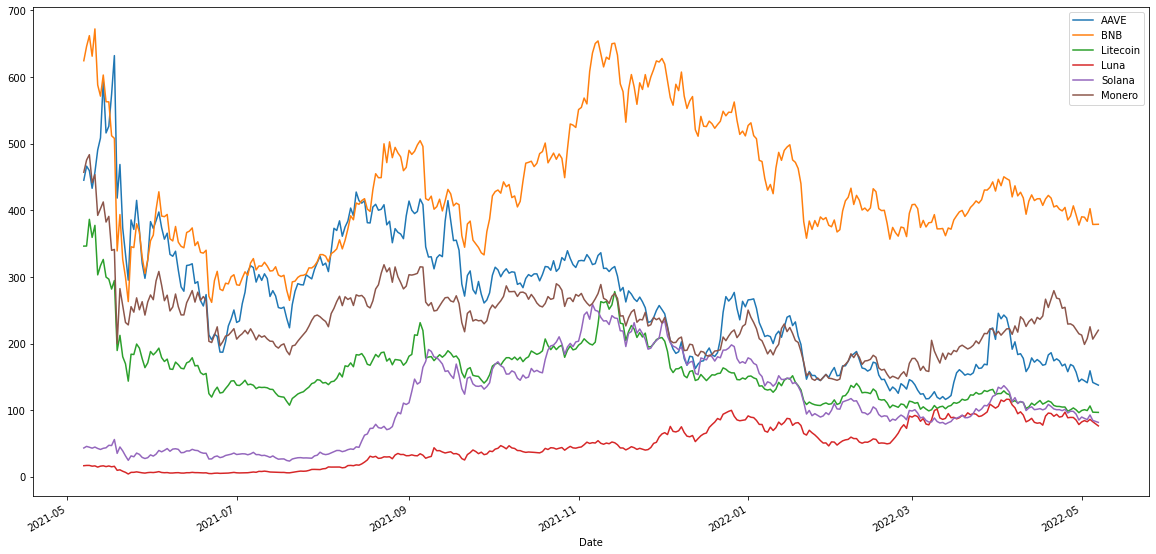

In [80]:
portfolio.plot(figsize=(20,10))

In [50]:
X1 = portfolio['AAVE']
X2 =  portfolio['BNB']
X3 = portfolio['Litecoin']
X4 =  portfolio['Luna']
X5 = portfolio['Solana']
X6 =  portfolio['Monero']

In [51]:
#Fuunção para avaliar estacionaridade de uma série
def avalia_estacionaridade(X, cutoff = 0.01):
  #H0 teste com raiz unitaria (não-estacionaria)
  pvalue = adfuller(X)[1]
  if pvalue < cutoff:
    print('pvalue =' + str(pvalue) + ' A Série ' + X.name + ' é estacionária')
    return True
  else:
    print('pvalue =' + str(pvalue) + ' A Série ' + X.name + ' não é estacionária')
    return False

Avaliando se as séries são estacionárias

In [52]:
avalia_estacionaridade(X1)

pvalue =0.5891466504029351 A Série AAVE não é estacionária


False

In [53]:
avalia_estacionaridade(X2)

pvalue =0.07451420668659262 A Série BNB não é estacionária


False

In [54]:
avalia_estacionaridade(X3)

pvalue =0.0004496840454574005 A Série Litecoin é estacionária


True

In [55]:
avalia_estacionaridade(X4)

pvalue =0.6707995544271315 A Série Luna não é estacionária


False

In [56]:
avalia_estacionaridade(X5)

pvalue =0.5864877347430456 A Série Solana não é estacionária


False

In [57]:
avalia_estacionaridade(X6)

pvalue =0.00022169136581969446 A Série Monero é estacionária


True

## Avaliação de correlação e cointegração entre os ativos X1 e X2 (AAVE e BNB)

Correlação entre séries

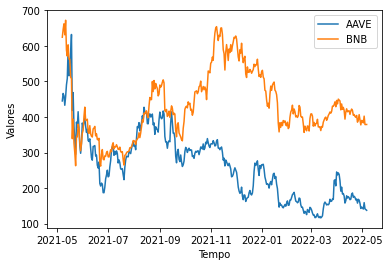

In [58]:

plt.plot(X1)
plt.plot(X2)
plt.xlabel('Tempo')
plt.ylabel('Valores')
plt.legend([X1.name, X2.name])
plt.show()

Correlação entre ativos

In [59]:
X1.corr(X2)

0.2055217708615846

baixa correlação. porem não indica que pode haver ou não cointegração!

Regressão linear entre os 2 ativos(regressão linear de minimos quadrados)

In [60]:
import statsmodels.api as sm
X1= sm.add_constant(X1)
results = sm.OLS(X2,X1).fit()

#retirar a coluna da constante necessária para regressão 
X1 = X1['AAVE']

results.params

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const    378.570771
AAVE       0.202138
dtype: float64

In [61]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BNB   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     16.01
Date:                Sat, 07 May 2022   Prob (F-statistic):           7.64e-05
Time:                        01:58:16   Log-Likelihood:                -2164.9
No. Observations:                 365   AIC:                             4334.
Df Residuals:                     363   BIC:                             4342.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        378.5708     14.172     26.713      0.000     350.701     406.440
AAVE           0.2021      0.051      4.001      0.000       0.103       0.301
==============================================================================
Omnibus:                       16.038   Durbin-Watson:                   0.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.182
Skew:                           0.447   Prob(JB):                     0.000505
Kurtosis:                       2.552   Cond. No.                         831.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

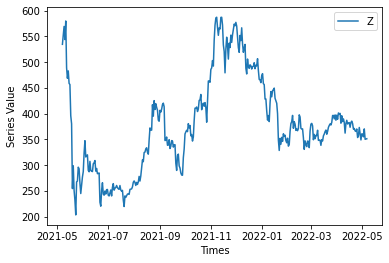

pvalue =0.15781737245486138 A Série Z não é estacionária


False

In [62]:
b = results.params['AAVE']
Z = X2 -b*X1
Z.name ='Z'


plt.plot(Z.index, Z.values)
plt.xlabel('Times')
plt.ylabel('Series Value')
plt.legend([Z.name])
plt.show()

avalia_estacionaridade(Z)

A série Z gerada entre os 2 ativos é não estácionaria portanto os ativos não são cointegrados!

In [65]:
coint(X1,X2)

(-1.3111357892233741,
 0.8263501667060297,
 array([-3.92678068, -3.35296748, -3.05612218]))

o p value = 0.82. está acimda de 0.05 portanto não tem cointegração entre as séries.

O portfólio tem 6 ativos, portanto pra saber as possibilidades dos pares cointegrados faz-se 

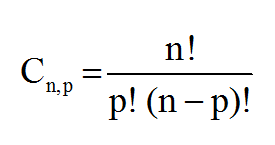


   6!/ 4! 2! = 15

   porém só são estacionárias as séries dos ativos x1, x2, x4 e x5

   portanto, 4!/2! 2! = 6

##Avaliação de correlação e cointegração entre os ativos X4 e X5 (Luna e	Solana)

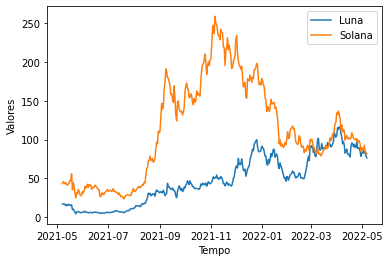

In [74]:

plt.plot(X4)
plt.plot(X5)
plt.xlabel('Tempo')
plt.ylabel('Valores')
plt.legend([X4.name, X5.name])
plt.show()

In [75]:
X4.corr(X5)

0.46646456105130263

In [77]:
X4= sm.add_constant(X4)
results = sm.OLS(X5,X4).fit()

#retirar a coluna da constante necessária para regressão 
X4 = X4['Luna']

results.params

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const    66.939623
Luna      0.929670
dtype: float64

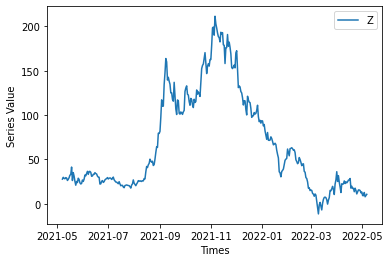

pvalue =0.7285380389672778 A Série Z não é estacionária


False

In [78]:
b = results.params['Luna']
Z = X5 -b*X4
Z.name ='Z'


plt.plot(Z.index, Z.values)
plt.xlabel('Times')
plt.ylabel('Series Value')
plt.legend([Z.name])
plt.show()

avalia_estacionaridade(Z)

In [79]:
coint(X4,X5)

(-0.8934059723158356,
 0.9212718928517802,
 array([-3.92678068, -3.35296748, -3.05612218]))

p value = 0.92 > 0.05 portão sem cointegração

## Avaliação de correlação e cointegração entre os ativos X1 e X4 (AAVE e Luna)

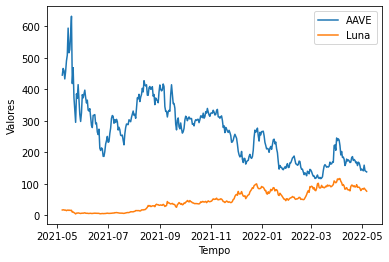

In [82]:
plt.plot(X1)
plt.plot(X4)
plt.xlabel('Tempo')
plt.ylabel('Valores')
plt.legend([X1.name, X4.name])
plt.show()

In [83]:
X1.corr(X4)

-0.6460169173502213

In [84]:
X1= sm.add_constant(X1)
results = sm.OLS(X4,X1).fit()

#retirar a coluna da constante necessária para regressão 
X1 = X1['AAVE']

results.params

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const    104.293172
AAVE      -0.214008
dtype: float64

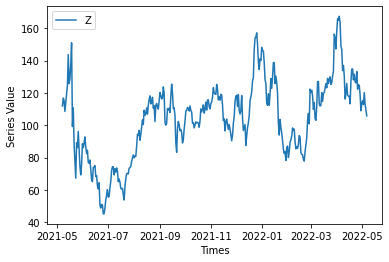

pvalue =0.0575460866055106 A Série Z não é estacionária


False

In [85]:
b = results.params['AAVE']
Z = X4 -b*X1
Z.name ='Z'


plt.plot(Z.index, Z.values)
plt.xlabel('Times')
plt.ylabel('Series Value')
plt.legend([Z.name])
plt.show()

avalia_estacionaridade(Z)





In [86]:
coint(X1,X4)

(-3.4007318602606444,
 0.04226924783861137,
 array([-3.92678068, -3.35296748, -3.05612218]))

## Avaliação de correlação e cointegração entre os ativos X1 e X5 (AAVE e Monero)

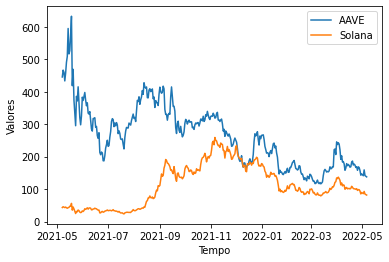

In [87]:
plt.plot(X1)
plt.plot(X5)
plt.xlabel('Tempo')
plt.ylabel('Valores')
plt.legend([X1.name, X5.name])
plt.show()

In [89]:
X1.corr(X5)

-0.10983297062393595

In [90]:
X1= sm.add_constant(X1)
results = sm.OLS(X5,X1).fit()

#retirar a coluna da constante necessária para regressão 
X1 = X1['AAVE']

results.params

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const    130.509473
AAVE      -0.072515
dtype: float64

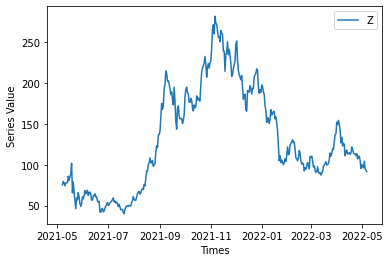

pvalue =0.6153979335881642 A Série Z não é estacionária


False

In [91]:
b = results.params['AAVE']
Z = X5 -b*X1
Z.name ='Z'


plt.plot(Z.index, Z.values)
plt.xlabel('Times')
plt.ylabel('Series Value')
plt.legend([Z.name])
plt.show()

avalia_estacionaridade(Z)




In [92]:
coint(X1,X5)

(-2.4802186824919503,
 0.2878621881474772,
 array([-3.92678068, -3.35296748, -3.05612218]))

 ## Avaliação de correlação e cointegração entre os ativos X2 e X4 (BNB	 e Solana)

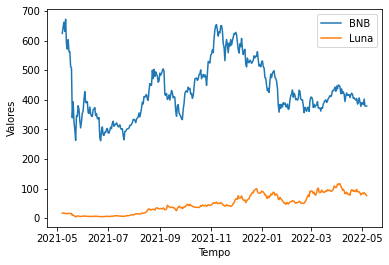

In [94]:
plt.plot(X2)
plt.plot(X4)
plt.xlabel('Tempo')
plt.ylabel('Valores')
plt.legend([X2.name, X4.name])
plt.show()

In [95]:
X2.corr(X4)

0.31307156491205274

In [97]:
X2= sm.add_constant(X2)
results = sm.OLS(X4,X2).fit()

#retirar a coluna da constante necessária para regressão 
X2 = X2['BNB']

results.params

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const    2.233594
BNB      0.105449
dtype: float64

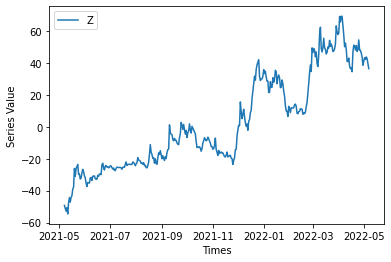

pvalue =0.5210875005539505 A Série Z não é estacionária


False

In [98]:
b = results.params['BNB']
Z = X4 -b*X2
Z.name ='Z'


plt.plot(Z.index, Z.values)
plt.xlabel('Times')
plt.ylabel('Series Value')
plt.legend([Z.name])
plt.show()

avalia_estacionaridade(Z)

In [99]:
coint(X2,X4)

(-2.8730709945776223,
 0.14353830854261856,
 array([-3.92678068, -3.35296748, -3.05612218]))

## Avaliação de correlação e cointegração entre os ativos X2 e X5 (BNB e Solana)

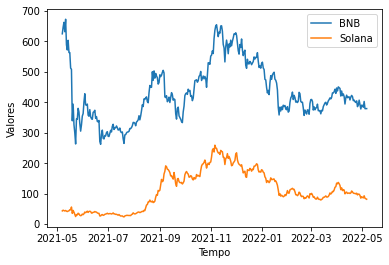

In [100]:
plt.plot(X2)
plt.plot(X5)
plt.xlabel('Tempo')
plt.ylabel('Valores')
plt.legend([X2.name, X5.name])
plt.show()

In [102]:
X2.corr(X5)

0.7500177421784086

In [103]:
X2= sm.add_constant(X2)
results = sm.OLS(X5,X2).fit()

#retirar a coluna da constante necessária para regressão 
X2 = X2['BNB']

results.params

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const   -106.114433
BNB        0.503477
dtype: float64

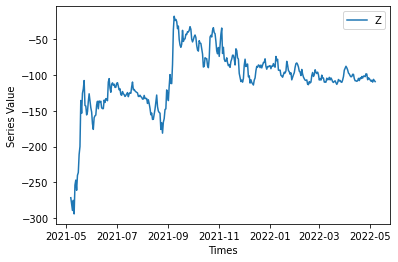

pvalue =0.0006962443099098729 A Série Z é estacionária


True

In [104]:
b = results.params['BNB']
Z = X5 -b*X2
Z.name ='Z'


plt.plot(Z.index, Z.values)
plt.xlabel('Times')
plt.ylabel('Series Value')
plt.legend([Z.name])
plt.show()

avalia_estacionaridade(Z)

In [105]:
coint(X2,X5)

(-4.669062790639971,
 0.0006372994370878545,
 array([-3.92678068, -3.35296748, -3.05612218]))

A série gerada entre BNB e Solana é estacionária é estacionária e o pvalue é < que 0.05. portanto pode ser usado par a estratégia de pair trading long and short!